# 前處理-資料清理
1. Fill in missing values
    - 平均值、標準差、屆在平均值與標準差之間的亂數
2. smooth noisy data
    - 取log: 10^1 => 1, 10^6 => 6
3. identify or remove outliers
    - PCA
4. resolve inconsistencies
    - domain knowledge
    
5. Normalize
    - L1 Norm(穩定: 水平調整較少): 
        - $\|𝑥\|_{1𝑖} = {𝑥_𝑖}{\sum{|𝑥_𝑖|}}$
    - L2 Norm(強健: 較能對抗outlier): 
        - $\|𝑥\|_{2𝑖}=\dfrac{𝑥_𝑖}{\sqrt{(\sum{𝑥_𝑖^2)}}}$

6. Categorical Data
Encoding: NLP = > cat, onehot encoding
7. Feature Generation
PolynomialFeatures: (𝑋_1, 𝑋_2)=> (1, 𝑋_1, 𝑋_2, 𝑋_1^2, 𝑋_1 𝑋_2, 𝑋_2^2)


# IMPORT & DATA

In [1]:
import pandas as pd
import numpy as np
from collections import Counter
import re
import numpy as np

from sklearn import preprocessing

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA

import os 
import random
import math

In [2]:
df = pd.read_csv('train.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [3]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


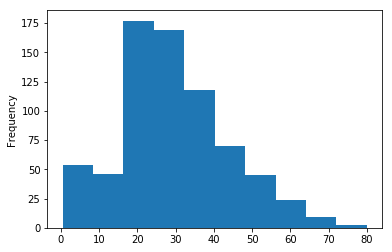

In [4]:
df['Age'].plot('hist')
plt.show()

In [5]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


# PREPROCESSING

## Age - Fill in missing values

In [6]:
# 作法一: 取平均值
avg_age = df['Age'].mean() 
print("avg_age", avg_age) # avg_age 29.69911764705882

# 作法二: 取中位數
median_age = df['Age'].median()
print("median_age", median_age) # median_age 28.0

# 作法三: 用相同的分布產生亂數塞入
np.random.seed(1212)
std = df['Age'].std()
mean = df['Age'].mean()
size = len(df[pd.isnull(df['Age'])])
random_age = np.random.randint(mean - std, mean + std, size=size)
print("random_age", random_age) # random_age [23 41 37 17 31 20 28 24 16 42 33 19 22 20 29 15 32 16 35 40 35 34 26 27


avg_age 29.69911764705882
median_age 28.0
random_age [23 41 37 17 31 20 28 24 16 42 33 19 22 20 29 15 32 16 35 40 35 34 26 27
 37 28 30 23 31 33 42 30 25 21 29 15 21 16 39 39 21 31 31 37 31 30 23 41
 30 35 33 21 31 28 39 37 31 29 29 40 16 43 20 29 36 22 27 41 32 24 35 23
 29 43 33 43 31 34 34 28 27 40 29 35 27 20 40 37 16 29 29 39 20 17 20 35
 24 42 34 33 26 38 42 31 30 40 34 16 35 16 34 24 43 29 22 29 20 43 29 38
 37 39 35 42 40 19 32 17 25 36 15 26 31 23 19 24 34 39 39 19 17 28 16 35
 20 16 29 18 34 43 16 28 30 42 27 25 36 19 22 43 37 38 30 15 32 38 41 21
 26 33 20 19 21 29 40 30 28]


In [7]:
df['avg_age'] = df['Age']
df.loc[pd.isnull(df['Age']), 'avg_age'] = avg_age
df['median_age'] = df['Age']
df.loc[pd.isnull(df['Age']), 'median_age'] = median_age
df['random_age'] = df['Age']
df.loc[pd.isnull(df['Age']), 'random_age'] = random_age

df.loc[pd.isnull(df['Age']), ['avg_age', 'median_age', 'random_age']].head()

,avg_age,median_age,random_age
5,29.699118,28.0,23.0
17,29.699118,28.0,41.0
19,29.699118,28.0,37.0
26,29.699118,28.0,17.0
28,29.699118,28.0,31.0


## Age - Normalize
- L1 Normalization: $|| x ||_2 = \sqrt{\left(\sum_i x_i^2\right)} = \sqrt{x_1^2 + x_2^2 + \ldots + x_i^2}$
- L2 Normalization: $|| x ||_1 = \sum_i |x_i| = |x_1| + |x_2| + \ldots + |x_i|$
- difference
![l1_l2_norm](./imgs/l1_l2_norm.svg)

In [8]:
def normalize(X, norm='l2'):
    """if type(X) == np.array, and X has two dimensiions"""
    if norm == "l1":
        l1_x = np.sum(X)
        X = X / l1_x
    elif norm == "l2":
        l2_x = np.sqrt(np.sum(np.square(X)))
        X = X / l2_x
    else:
        assert False, "please assign norm to be either 'l1' or 'l2'"
    return X

In [9]:
X = [[ 1., -1.,  2.],
     [ 2.,  0.,  0.],
     [ 0.,  1., -1.]]
X_normalized = normalize(X, norm='l1')
print("l1_norm")
print(X_normalized)
print()
# l1_norm
# [[ 0.25 -0.25  0.5 ]
#  [ 0.5   0.    0.  ]
#  [ 0.    0.25 -0.25]]

X_normalized = normalize(X, norm='l2')
print("l2_norm")
print(X_normalized)
print()
# l2_norm
# [[ 0.28867513 -0.28867513  0.57735027]
#  [ 0.57735027  0.          0.        ]
#  [ 0.          0.28867513 -0.28867513]]

X_normalized = preprocessing.normalize(X, norm='l1')
print("sklearn l1_norm")
print(X_normalized)
print()
# sklearn l1_norm
# [[ 0.25 -0.25  0.5 ]
#  [ 1.    0.    0.  ]
#  [ 0.    0.5  -0.5 ]]


l1_norm
[[ 0.25 -0.25  0.5 ]
 [ 0.5   0.    0.  ]
 [ 0.    0.25 -0.25]]

l2_norm
[[ 0.28867513 -0.28867513  0.57735027]
 [ 0.57735027  0.          0.        ]
 [ 0.          0.28867513 -0.28867513]]

sklearn l1_norm
[[ 0.25 -0.25  0.5 ]
 [ 1.    0.    0.  ]
 [ 0.    0.5  -0.5 ]]



In [11]:
# 使用preprocessing.normalize
avg_age_l1 = normalize([df['avg_age'].values], norm='l1')[0]
avg_age_l2 = normalize([df['avg_age'].values], norm='l2')[0]

df['avg_age_l1'] = avg_age_l1
df['avg_age_l2'] = avg_age_l2

df[['avg_age', 'avg_age_l1', 'avg_age_l2']].head()

,avg_age,avg_age_l1,avg_age_l2
0,22.0,0.000831,0.022735
1,38.0,0.001436,0.039270
2,26.0,0.000983,0.026869
3,35.0,0.001323,0.036170
4,35.0,0.001323,0.036170


## Cabin - NLP category

In [12]:
# 整理出每一個Cabin的個數並排序
sorted_cabin_counter = sorted(dict(Counter(df['Cabin'].astype(str))).items(), key=lambda x:x[0])
print(sorted_cabin_counter)
# [('A10', 1), ('A14', 1), ('A16', 1), ('A19', 1), ('A20', 1), ('A23', 1), ('A24', 1), ('A26', 1), ('A31', 1), ('A32', 1), ('A34', 1), ('A36', 1), ('A5', 1), ('A6', 1), ('A7', 1), ('B101', 1), ('B102', 1), ('B18', 2), ('B19', 1), ('B20', 2), ('B22', 2), ('B28', 2), ('B3', 1), ('B30', 1), ('B35', 2), ('B37', 1), ('B38', 1)

[('A10', 1), ('A14', 1), ('A16', 1), ('A19', 1), ('A20', 1), ('A23', 1), ('A24', 1), ('A26', 1), ('A31', 1), ('A32', 1), ('A34', 1), ('A36', 1), ('A5', 1), ('A6', 1), ('A7', 1), ('B101', 1), ('B102', 1), ('B18', 2), ('B19', 1), ('B20', 2), ('B22', 2), ('B28', 2), ('B3', 1), ('B30', 1), ('B35', 2), ('B37', 1), ('B38', 1), ('B39', 1), ('B4', 1), ('B41', 1), ('B42', 1), ('B49', 2), ('B5', 2), ('B50', 1), ('B51 B53 B55', 2), ('B57 B59 B63 B66', 2), ('B58 B60', 2), ('B69', 1), ('B71', 1), ('B73', 1), ('B77', 2), ('B78', 1), ('B79', 1), ('B80', 1), ('B82 B84', 1), ('B86', 1), ('B94', 1), ('B96 B98', 4), ('C101', 1), ('C103', 1), ('C104', 1), ('C106', 1), ('C110', 1), ('C111', 1), ('C118', 1), ('C123', 2), ('C124', 2), ('C125', 2), ('C126', 2), ('C128', 1), ('C148', 1), ('C2', 2), ('C22 C26', 3), ('C23 C25 C27', 4), ('C30', 1), ('C32', 1), ('C45', 1), ('C46', 1), ('C47', 1), ('C49', 1), ('C50', 1), ('C52', 2), ('C54', 1), ('C62 C64', 1), ('C65', 2), ('C68', 2), ('C7', 1), ('C70', 1), ('C78', 

In [13]:
# 抓出第一個char出來分類，並轉成int類別
new_Cabin = df['Cabin'].apply(lambda x:str(x)[0])
print(new_Cabin.values[:10])
# ['n' 'C' 'n' 'C' 'n' 'n' 'E' 'n' 'n' 'n']

mapping_dict = dict([(c, idx) for idx, c in enumerate(set(new_Cabin))])
print(mapping_dict)
# {'n': 0, 'B': 1, 'T': 2, 'E': 3, 'C': 4, 'F': 5, 'G': 6, 'D': 7, 'A': 8}

new_Cabin_int = [mapping_dict.get(c) for c in new_Cabin]
print(new_Cabin_int[:10])
# [0, 4, 0, 4, 0, 0, 3, 0, 0, 0]


['n' 'C' 'n' 'C' 'n' 'n' 'E' 'n' 'n' 'n']
{'T': 0, 'C': 1, 'E': 2, 'n': 3, 'G': 4, 'A': 5, 'B': 6, 'D': 7, 'F': 8}
[3, 1, 3, 1, 3, 3, 2, 3, 3, 3]


In [14]:
df['cabin_cat'] = new_Cabin_int
df[['Cabin', 'cabin_cat']].head()

,Cabin,cabin_cat
0,NaN,3
1,C85,1
2,NaN,3
3,C123,1
4,NaN,3


In [15]:
Counter(df['cabin_cat'])

Counter({3: 687, 1: 59, 2: 32, 4: 4, 7: 33, 5: 15, 6: 47, 8: 13, 0: 1})

## Sex - Category

In [16]:
Counter(df['Sex'])

Counter({'male': 577, 'female': 314})

In [20]:
# 創造出一個與df['Sex']等長的array，並將df['Sex']中的male換成1，female換成0
sex_mapping = { 'male':1, 'female':0}
sex_cat = df['Sex'].apply(sex_mapping.get)
print("Counter(sex_cat)", Counter(sex_cat))
#Counter(sex_cat) Counter({1: 577, 0: 314})

df['sex_cat'] = sex_cat


Counter(sex_cat) Counter({1: 577, 0: 314})


In [16]:
Counter(df['sex_cat'])

Counter({1.0: 577, 0.0: 314})

## Ticket - Category

In [19]:
# 整理出每一個Ticket的個數並排序
sorted_ticket_counter = sorted(dict(Counter(df['Ticket'].astype(str))).items(), key=lambda x:x[0])
print(sorted_ticket_counter)

[('110152', 3), ('110413', 3), ('110465', 2), ('110564', 1), ('110813', 1), ('111240', 1), ('111320', 1), ('111361', 2), ('111369', 1), ('111426', 1), ('111427', 1), ('111428', 1), ('112050', 1), ('112052', 1), ('112053', 1), ('112058', 1), ('112059', 1), ('112277', 1), ('112379', 1), ('113028', 1), ('113043', 1), ('113050', 1), ('113051', 1), ('113055', 1), ('113056', 1), ('113059', 1), ('113501', 1), ('113503', 1), ('113505', 2), ('113509', 1), ('113510', 1), ('113514', 1), ('113572', 2), ('113760', 4), ('113767', 1), ('113773', 1), ('113776', 2), ('113781', 4), ('113783', 1), ('113784', 1), ('113786', 1), ('113787', 1), ('113788', 1), ('113789', 2), ('113792', 1), ('113794', 1), ('113796', 1), ('113798', 2), ('113800', 1), ('113803', 2), ('113804', 1), ('113806', 2), ('113807', 1), ('11668', 2), ('11751', 2), ('11752', 1), ('11753', 1), ('11755', 1), ('11765', 1), ('11767', 2), ('11769', 1), ('11771', 1), ('11774', 1), ('11813', 1), ('11967', 2), ('12233', 1), ('12460', 1), ('12749'

In [23]:
# ticket
ticket_cat = {}
for ticket in df['Ticket']:
    if ticket.isdigit():
        ticket_cat[ticket] = 1
    elif ticket.startswith('A'):
        ticket_cat[ticket] = 2
    elif ticket.startswith('C'):
        ticket_cat[ticket] = 3
    elif ticket.startswith('F'):
        ticket_cat[ticket] = 4
    elif ticket.startswith('P'):
        ticket_cat[ticket] = 5
    elif ticket.startswith('SOTON'):
        ticket_cat[ticket] = 6
    elif ticket.startswith('STON'):
        ticket_cat[ticket] = 7
    elif ticket.startswith('S'):
        ticket_cat[ticket] = 8
    elif ticket.startswith('W'):
        ticket_cat[ticket] = 9
    else:
        ticket_cat[ticket] = 0
df['ticket_cat'] = df['Ticket'].apply(ticket_cat.get)
print(Counter(df['ticket_cat']))


Counter({1: 661, 5: 65, 3: 47, 8: 30, 2: 29, 7: 18, 6: 17, 9: 13, 4: 7, 0: 4})


## Embarked - Category

In [24]:
# 整理出每一個Embarked的個數並排序
sorted_embarked_counter = sorted(dict(Counter(df['Embarked'].astype(str))).items(), key=lambda x:x[0])
print(sorted_embarked_counter)

[('C', 168), ('Q', 77), ('S', 644), ('nan', 2)]


In [27]:
# 創造embarked的類別對應dict
embarked_cat = dict([(e,i)for i, e in enumerate(set(df['Embarked']))])
print(embarked_cat)
#{nan: 0, 'S': 1, 'Q': 2, 'C': 3}


{nan: 0, 'S': 1, 'Q': 2, 'C': 3}


In [29]:
# 轉換embarked為數字類別
df['embarked_cat'] = df['Embarked'].apply(embarked_cat.get)
Counter(df['embarked_cat'])
#Counter({1: 644, 3: 168, 2: 77, 0: 2})


Counter({1: 644, 3: 168, 2: 77, 0: 2})

## Title - NLP category, Length, onehot

In [33]:
# title
title_mapping= {
    'Ms':"Miss",
    'Mlle':"Miss",
    'Miss':"Miss",
    'Mrs':"Mrs",
    'Mme':"Mrs",
    'MrsMartin(ElizabethL':"Mrs",
    'Mr':"Mr"
    }

title_cat = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}

In [34]:
def process_title(name):
    call = re.search(r'\,.+\.', name).group(0).replace(",", "").replace(".", "").replace(" ", "")
    if title_cat.get(call):
        return title_cat.get(call)
    else:
        return title_cat.get(title_mapping.get(call, "Rare"))
df['title'] = df['Name'].apply(process_title) 
Counter(df['title'])

Counter({1: 517, 3: 126, 2: 185, 4: 40, 5: 23})

In [27]:
enc = preprocessing.OneHotEncoder()
enc.fit_transform(df['title'].values.reshape(-1,1)).toarray()

c:\users\user\appdata\local\programs\python\python36\lib\site-packages\sklearn\preprocessing\_encoders.py:363: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


array([[1., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 1., 0., 0., 0.],
       ...,
       [0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.]])

In [43]:
# 算出df['Name']中每一個名字的長度並放進一個array
name_length = df['Name'].apply(len)
print(Counter(pd.cut(name_length, bins=10, labels=range(10))))
# Counter({1: 303, 2: 237, 0: 204, 3: 57, 4: 53, 5: 26, 6: 8, 7: 2, 9: 1})


Counter({1: 303, 2: 237, 0: 204, 3: 57, 4: 53, 5: 26, 6: 8, 7: 2, 9: 1})


In [44]:
df['name_length'] = name_length

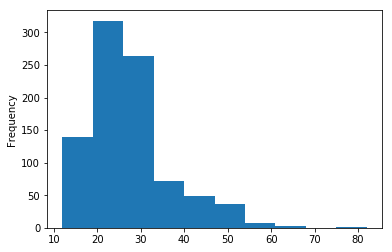

In [45]:
# 劃出每一長度區間次數的長條圖(如長度界在10~20之間的有出現約150次)
df['name_length'].plot('hist')
plt.show()


## Fare - PCA, smooth noisy data, feature generation

In [29]:
df['Fare'].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

In [30]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'avg_age', 'median_age',
       'random_age', 'avg_age_l1', 'avg_age_l2', 'cabin_cat', 'sex_cat',
       'ticket_cat', 'embarked_cat', 'title', 'name_length'],
      dtype='object')

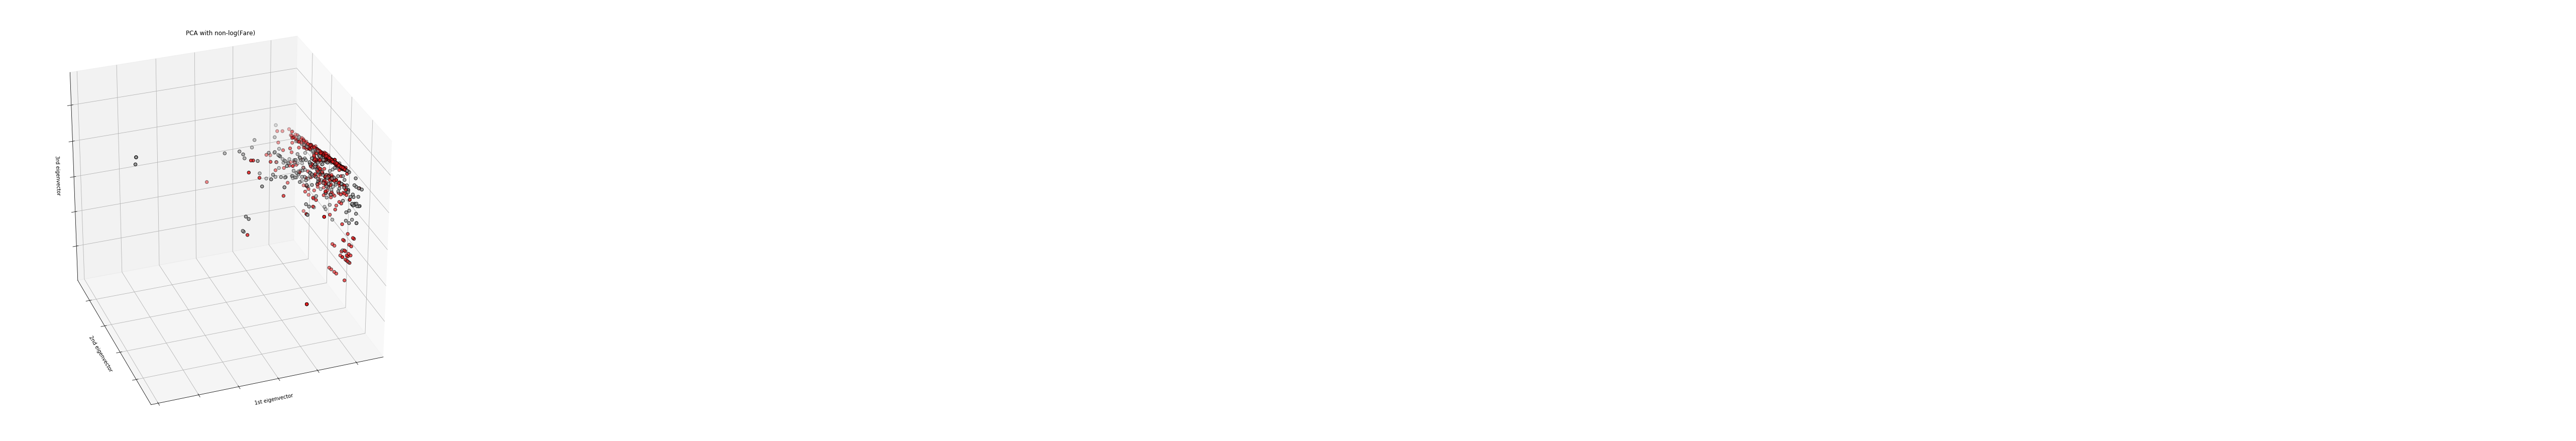

In [40]:
X = df[['Parch', 'SibSp', 'avg_age', 'Fare']].values
Y = np.array(df['Survived'])

fig = plt.figure(1, figsize=(12, 12))
ax = Axes3D(fig, elev=-150, azim=110)

X_reduced = PCA(n_components=3).fit_transform(X)
ax.scatter(X_reduced[:, 0], X_reduced[:, 1], X_reduced[:, 2], c=Y,
           cmap=plt.cm.Set1, edgecolor='k', s=40)
ax.set_title("PCA with non-log(Fare)")
ax.set_xlabel("1st eigenvector")
ax.w_xaxis.set_ticklabels([])
ax.set_ylabel("2nd eigenvector")
ax.w_yaxis.set_ticklabels([])
ax.set_zlabel("3rd eigenvector")
ax.w_zaxis.set_ticklabels([])

plt.show()

In [41]:
avg_fare = df['Fare'].mean()
def Fare_log(fare):
    if fare != 0 :
        return math.log(fare, 10)
    else:
        return 0
df['Fare'].fillna(avg_fare)
df['fare_log10'] = df['Fare'].apply(Fare_log)
df[['Fare', 'fare_log10']].head()

,Fare,fare_log10
0,7.2500,0.860338
1,71.2833,1.852988
2,7.9250,0.898999
3,53.1000,1.725095
4,8.0500,0.905796


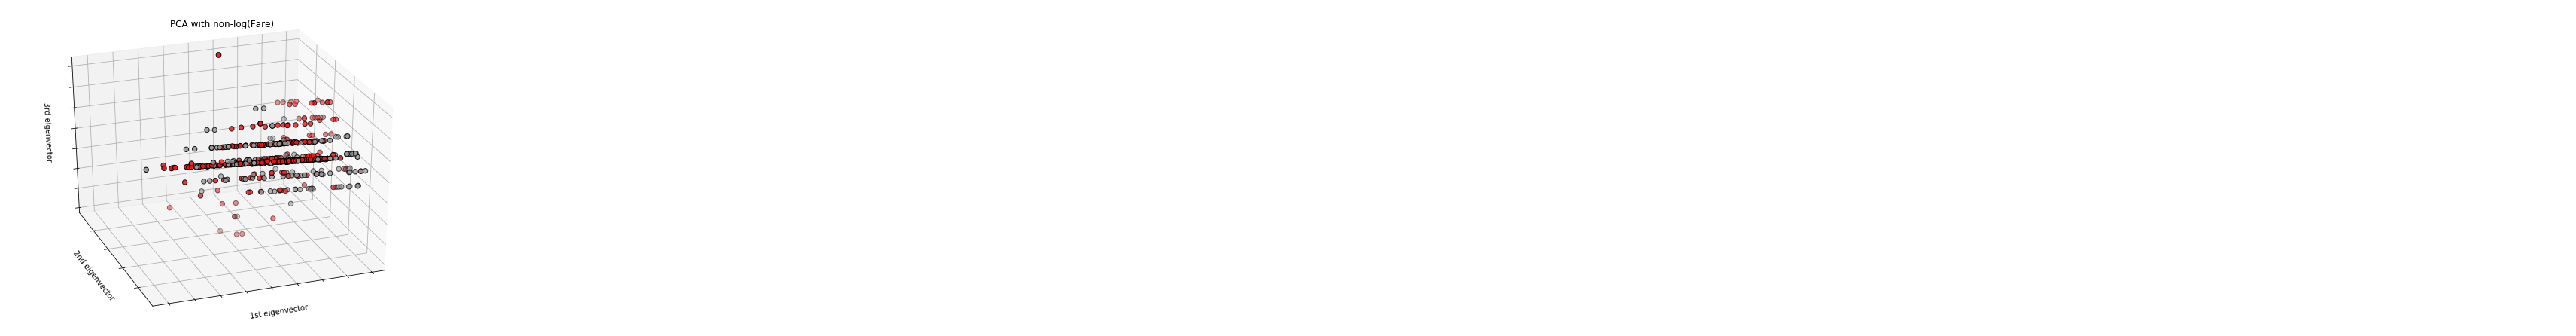

In [42]:
X = np.matrix(df[['Parch', 'SibSp', 'avg_age', 'fare_log10']])
Y = np.array(df['Survived'])

fig = plt.figure(1, figsize=(8, 6))
ax = Axes3D(fig, elev=-150, azim=110)

X_reduced = PCA(n_components=3).fit_transform(X)
ax.scatter(X_reduced[:, 0], X_reduced[:, 1], X_reduced[:, 2], c=Y,
           cmap=plt.cm.Set1, edgecolor='k', s=40)
ax.set_title("PCA with non-log(Fare)")
ax.set_xlabel("1st eigenvector")
ax.w_xaxis.set_ticklabels([])
ax.set_ylabel("2nd eigenvector")
ax.w_yaxis.set_ticklabels([])
ax.set_zlabel("3rd eigenvector")
ax.w_zaxis.set_ticklabels([])

plt.show()

In [43]:
poly = preprocessing.PolynomialFeatures(2)
age_fare_ploy = poly.fit_transform(df[['fare_log10', 'random_age']])
age_fare_ploy

array([[1.00000000e+00, 8.60338007e-01, 2.20000000e+01, 7.40181486e-01,
        1.89274361e+01, 4.84000000e+02],
       [1.00000000e+00, 1.85298780e+00, 3.80000000e+01, 3.43356378e+00,
        7.04135363e+01, 1.44400000e+03],
       [1.00000000e+00, 8.98999271e-01, 2.60000000e+01, 8.08199689e-01,
        2.33739810e+01, 6.76000000e+02],
       ...,
       [1.00000000e+00, 1.37014285e+00, 2.40000000e+01, 1.87729142e+00,
        3.28834283e+01, 5.76000000e+02],
       [1.00000000e+00, 1.47712125e+00, 2.60000000e+01, 2.18188720e+00,
        3.84051526e+01, 6.76000000e+02],
       [1.00000000e+00, 8.89301703e-01, 3.20000000e+01, 7.90857518e-01,
        2.84576545e+01, 1.02400000e+03]])

## Preprocessing Conclude

In [44]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'avg_age', 'median_age',
       'random_age', 'avg_age_l1', 'avg_age_l2', 'cabin_cat', 'sex_cat',
       'ticket_cat', 'embarked_cat', 'title', 'name_length', 'fare_log10'],
      dtype='object')

In [45]:
df_train = df[['Age', 'random_age', 'avg_age_l1', 'avg_age_l2', 'cabin_cat', 'Fare', 'fare_log10', 'sex_cat', 'ticket_cat', 'embarked_cat', 'title', 'name_length', 'SibSp', 'Parch',]]
df_train.describe()

,Age,random_age,avg_age_l1,avg_age_l2,cabin_cat,Fare,fare_log10,sex_cat,ticket_cat,embarked_cat,title,name_length,SibSp,Parch
count,714.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,29.699118,29.694916,0.001122,0.030692,0.648709,32.204208,1.256781,0.647587,2.017957,0.463524,1.728395,26.965208,0.523008,0.381594
std,14.526497,13.530546,0.000491,0.013437,1.376792,49.693429,0.435553,0.477990,2.059702,0.791503,1.030039,9.281607,1.102743,0.806057
min,0.420000,0.420000,0.000016,0.000434,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,12.000000,0.000000,0.000000
25%,20.125000,21.000000,0.000831,0.022735,0.000000,7.910400,0.898198,0.000000,1.000000,0.000000,1.000000,20.000000,0.000000,0.000000
50%,28.000000,29.000000,0.001122,0.030692,0.000000,14.454200,1.159994,1.000000,1.000000,0.000000,1.000000,25.000000,0.000000,0.000000
75%,38.000000,38.000000,0.001323,0.036170,0.000000,31.000000,1.491362,1.000000,2.000000,1.000000,2.000000,30.000000,1.000000,0.000000
max,80.000000,80.000000,0.003023,0.082674,5.000000,512.329200,2.709549,1.000000,9.000000,2.000000,5.000000,82.000000,8.000000,6.000000


In [46]:
X_train = np.concatenate([df_train.values, age_fare_ploy], axis=1)
print(df_train.values.shape)
print(age_fare_ploy.shape)
print(X_train.shape)

(891, 14)
(891, 6)
(891, 20)
